# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [15]:
int_features = []
float_features = []
object_features = []
for i in app_train.columns:
    if app_train[i].dtypes == np.dtype('int64'):
        int_features.append(i)
    elif app_train[i].dtypes == np.dtype('float64'):
        float_features.append(i)
    elif app_train[i].dtypes == np.dtype('object'):
        object_features.append(i)
    else:
        print(i + "is not belong to any dtype")

In [23]:
app_train.dtypes.reset_index().groupby([0]).agg('count')

,index
0,
int64,41
float64,65
object,16


In [25]:
# 計算int_features中的平均數
app_train[int_features].mean()

SK_ID_CURR                     278180.518577
TARGET                              0.080729
CNT_CHILDREN                        0.417052
DAYS_BIRTH                     -16036.995067
DAYS_EMPLOYED                   63815.045904
DAYS_ID_PUBLISH                 -2994.202373
FLAG_MOBIL                          0.999997
FLAG_EMP_PHONE                      0.819889
FLAG_WORK_PHONE                     0.199368
FLAG_CONT_MOBILE                    0.998133
FLAG_PHONE                          0.281066
FLAG_EMAIL                          0.056720
REGION_RATING_CLIENT                2.052463
REGION_RATING_CLIENT_W_CITY         2.031521
HOUR_APPR_PROCESS_START            12.063419
REG_REGION_NOT_LIVE_REGION          0.015144
REG_REGION_NOT_WORK_REGION          0.050769
LIVE_REGION_NOT_WORK_REGION         0.040659
REG_CITY_NOT_LIVE_CITY              0.078173
REG_CITY_NOT_WORK_CITY              0.230454
LIVE_CITY_NOT_WORK_CITY             0.179555
FLAG_DOCUMENT_2                     0.000042
FLAG_DOCUM

In [26]:
# 計算float_features中的標準差
app_train[float_features].std()

AMT_INCOME_TOTAL              237123.146279
AMT_CREDIT                    402490.776996
AMT_ANNUITY                    14493.737315
AMT_GOODS_PRICE               369446.460540
REGION_POPULATION_RELATIVE         0.013831
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.110757
AMT_REQ_CREDIT_BUREAU_WEEK         0.204685
AMT_REQ_CREDIT_BUREAU_MON          0.916002
AMT_REQ_CREDIT_BUREAU_QRT          0.794056
AMT_REQ_CREDIT_BUREAU_YEAR         1.869295
Length: 65, dtype: float64

<AxesSubplot:ylabel='Frequency'>

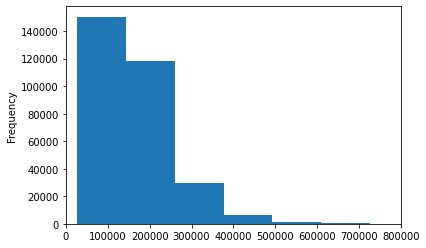

In [44]:
# 畫出直方圖
x_max = 800000
app_train['AMT_INCOME_TOTAL'].plot(xlim=(0,x_max),kind='hist',bins=1000)